In [4]:
import numpy as np
import matplotlib.pyplot as plt

pi = np.pi

Text(0.5, 0, 'n')

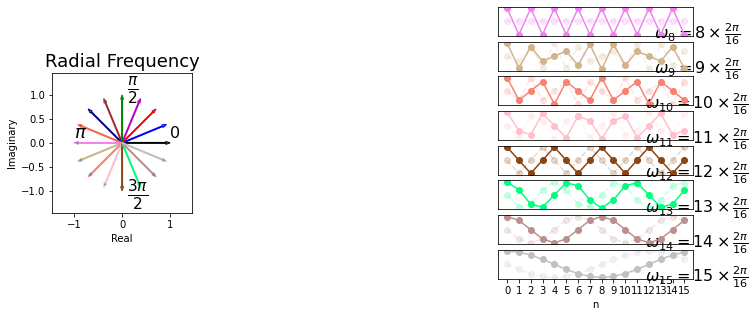

In [14]:
# must start notebook with --pylab flag
from matplotlib.patches import FancyArrow
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.gridspec as gridspec
def dftmatrix(Nfft=32,N=None):
    'construct DFT matrix'
    k= np.arange(Nfft)
    if N is None: N = Nfft
    n = np.arange(N)
    U = np.matrix(np.exp(1j* 2*pi/Nfft *k*n[:,None])) # use numpy broadcasting to create matrix
    return U/np.sqrt(Nfft)

Nfft=16
v = np.ones((16,1))
U = dftmatrix(Nfft=Nfft,N=16)
# ---
# hardcoded constants to format complicated figure
gs = gridspec.GridSpec(8,12)
gs.update( wspace=1, left=0.01)

fig = plt.figure(figsize=(10,5))
ax0 = plt.subplot(gs[:,:3])
fig.add_subplot(ax0)
ax0.set_aspect(1)
a=2*pi/Nfft*np.arange(Nfft)
colors = ['k','b','r','m','g','Brown','DarkBlue','Tomato','Violet', 'Tan',
'Salmon','Pink','SaddleBrown', 'SpringGreen', 'RosyBrown','Silver',]
for j,i in enumerate(a):
    ax0.add_patch(FancyArrow(0,0,np.cos(i),np.sin(i),width=0.02,
    length_includes_head=True,edgecolor=colors[j]))
ax0.text(1,0.1,'0',fontsize=16)
ax0.text(0.1,1,r'$\frac{\pi}{2}$',fontsize=22)
ax0.text(-1,0.1,r'$\pi$',fontsize=18)
ax0.text(0.1,-1.2,r'$\frac{3\pi}{2}$',fontsize=22)
ax0.axis(np.array([-1,1,-1,1])*1.45)
ax0.set_title('Radial Frequency',fontsize=18)
ax0.set_xlabel('Real')
ax0.set_ylabel('Imaginary')

# plots in the far right column
for i in range(8):
    ax = plt.subplot(gs[i,8:])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylabel(r'$\omega_{%d} = %d\times\frac{2\pi}{16}$' % (i + 8,i + 8),fontsize = 16,
    rotation = 'horizontal')
    ax.plot(U.real[:,i + 8],'-o',color=colors[i + 8])
    ax.plot(U.imag[:,i + 8],'--o',color=colors[i + 8],alpha = 0.2)
    ax.axis(ymax=4 / Nfft * 1.1,ymin=-4 / Nfft * 1.1)
    ax.yaxis.set_label_position('right')
ax.set_xticks(np.arange(16))
ax.set_xlabel('n')

In [27]:
subplots = plt.subplots
ones = np.ones
arange = np.arange
cos = np.cos
sin = np.sin
vstack = np.vstack

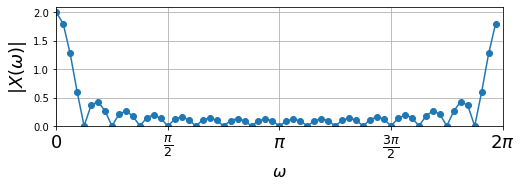

In [16]:
U = dftmatrix(64,16)
x = ones((16,1))
X = U.H * x

fig,ax = subplots()
fig.set_size_inches((8,4))
ax.set_aspect(0.8)
ax.grid()
ax.plot(arange(0,64) * 2 * pi / 64.,abs(X),'o-')
ax.set_ylabel(r'$ | X(\omega)|$',fontsize=18)
ax.set_xticks([0, pi / 2., pi, 3 * pi / 2,2 * pi])
ax.set_xlabel(r'$\omega$',fontsize = 16)
ax.axis([0, 2 * pi,0,2.1])
ax.set_xticklabels(['0',r'$\frac{\pi}{2}$', r'$\pi$',r'$\frac{3\pi}{2}$',
r'$2\pi$'], fontsize=18);

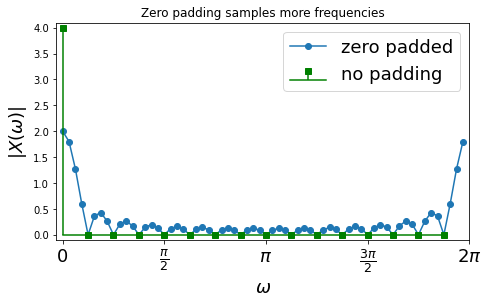

In [17]:
U = dftmatrix(64,16)
x = ones((16,1))
X = U.H * x

fig,ax = subplots()
fig.set_size_inches((8,4))

ax.set_aspect(0.8) # aspect ratio
ax.plot(arange(0,64) * 2 * pi / 64.,abs(X),'o-',label = 'zero padded')
ax.stem(arange(0,16) * 2 * pi / 16.,abs(dftmatrix(16).H * x),
    markerfmt='gs', basefmt = 'g-',linefmt = 'g-',
    label = 'no padding')
ax.set_xlabel(r'$\omega$',fontsize = 18)
ax.set_ylabel(r'$ | X(\omega)|$',fontsize=18)
ax.set_xticks([0, pi / 2., pi, 3 * pi / 2,2 * pi])
ax.axis([-.1, 2 * pi,-.1,4.1])
ax.legend(loc=0,fontsize=18)
ax.set_xticklabels(['0',r'$\frac{\pi}{2}$', r'$\pi$',r'$\frac{3\pi}{2}$',
    r'$2\pi$'], fontsize=18)
ax.set_title('Zero padding samples more frequencies');

In [19]:
drawInOut = lambda ax,x,y,color,label: ax.plot(x,y,color,label=label)

In [ ]:
facet_filled = np 

In [32]:

def facet_filled(x,alpha=0.5,color='b'):
    'construct 3D facet from adjacent points filled to zero'
    a,b=x
    a0= a*np.array([1,1,0])
    b0= b*np.array([1,1,0])
    ve = vstack([a,a0,b0,b])      # create closed polygon facet
    poly = Poly3DCollection([ve]) # create facet
    poly.set_alpha(alpha)
    poly.set_color(color)
    return poly

def drawDFTView(X,ax=None,fig=None):
    'above code as a function. Draws 3D diagram given DFT matrix'
    a=2*pi/len(X)*arange(len(X))
    d=vstack([cos(a),sin(a),np.array(abs(X)).flatten()]).T
    if ax is None and fig is None:
        fig = plt.figure()
        fig.set_size_inches(6,6)
        
    if ax is None: # add ax to existing figure
        ax = fig.add_subplot(1, 1, 1, projection='3d')
        
    ax.axis([-1,1,-1,1])
    ax.set_zlim([0,d[:,2].max()])
    ax.set_aspect('auto')
    ax.view_init(azim=-30)
    a=FancyArrow(0,0,1,0,width=0.02,length_includes_head=True)
    ax.add_patch(a)
    b=FancyArrow(0,0,0,1,width=0.02,length_includes_head=True)
    ax.add_patch(b)
    art3d.patch_2d_to_3d(a)
    art3d.patch_2d_to_3d(b)
    #ax.set_xticks([])
    #ax.set_yticks([])
    #ax.set_zticks([])
    ax.axis('off')

    sl=[slice(i,i+2) for i in range(d.shape[0]-2)] # collect neighboring points
    for s in sl:
      poly=facet_filled(d[s,:])
      ax.add_collection3d(poly)
     
    # edge polygons    
    ax.add_collection3d(facet_filled(d[[-1,0],:]))
    ax.add_collection3d(facet_filled(d[[-2,-1],:]))

def drawInOut(X,v,return_axes=False):
    fig = plt.figure()
    fig.set_size_inches(8,8)
    gs = gridspec.GridSpec(8,6)
        
    ax1 = plt.subplot(gs[3:5,:2])
    ax2 = plt.subplot(gs[:,2:],projection='3d')
    
    ax1.stem(arange(len(v)),v)
    ymin,ymax= ax1.get_ylim()
    ax1.set_ylim(ymax = ymax*1.2, ymin = ymin*1.2)
    ax1.set_title('input signal')
    ax1.set_xlabel('time sample index')
    ax1.tick_params(labelsize=8)
    
    drawDFTView(X,ax2)
    if return_axes:
        return ax1,ax2

Text(0.5, 1.0, '$\\omega = \\frac{2\\pi 5}{16}$')

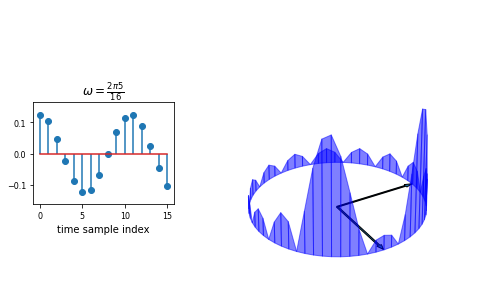

In [33]:
v = U[:,6].real
ax1,ax2 = drawInOut(U.H * v,v,return_axes=1)
ax1.set_title(r'$\omega = \frac{2\pi 5}{16}$')

Text(0.5, 1.0, 'Lowest Frequency')

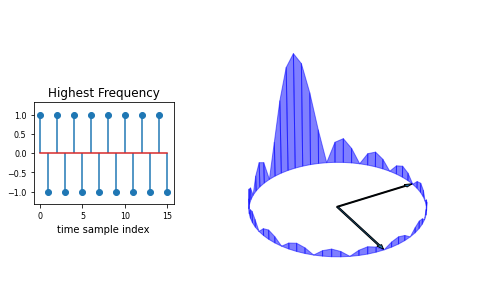

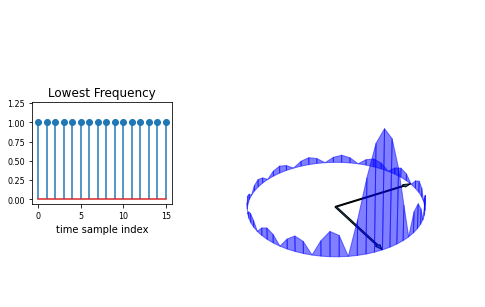

In [35]:
v = np.matrix(cos(pi * arange(0,16))).T
ax1,ax2 = drawInOut(U.H * v,v,return_axes=1)
ax1.set_title('Highest Frequency')
v = ones((16,1))
ax1,ax2 = drawInOut(U.H * v,v,return_axes=1)
ax1.set_title('Lowest Frequency')

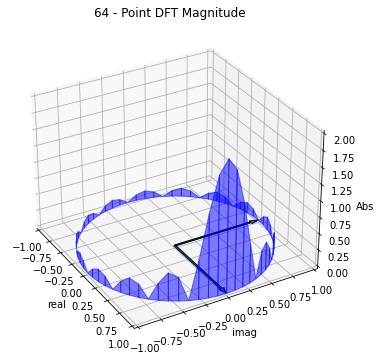

In [38]:
a = 2 * pi / 64. * arange(64)
d = vstack([cos(a),sin(a),np.array(abs(X)).flatten()]).T

fig = plt.figure()
fig.set_size_inches(6,6)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.axis([-1,1,-1,1])
ax.set_zlim([0,d[:,2].max()])
ax.set_aspect('auto')
ax.view_init(azim=-30)

ax.set_xlabel('real')
ax.set_ylabel('imag')
ax.set_zlabel('Abs')
ax.set_title('64 - Point DFT Magnitude')


sl = [slice(i,i + 2) for i in range(d.shape[0] - 2)] # collect neighboring points
for s in sl:
    poly = facet_filled(d[s,:])
    ax.add_collection3d(poly)

# edge polygons
ax.add_collection3d(facet_filled(d[[-1,0],:]))
ax.add_collection3d(facet_filled(d[[-2,-1],:]))

# add 0 and pi/2 arrows for reference
a = FancyArrow(0,0,1,0,width=0.02,length_includes_head=True)
ax.add_patch(a)
b = FancyArrow(0,0,0,1,width=0.02,length_includes_head=True)
ax.add_patch(b)
art3d.patch_2d_to_3d(a)
art3d.patch_2d_to_3d(b)
plt.show()

In [ ]:
https://drive.google.com/file/d/1w2dgTUKNkebGT5O-ENG31nfKpTgkXBeR/view?usp=sharing

In [ ]:
c.txt

In [ ]:
import os